<a href="https://colab.research.google.com/github/david116711/2021DL/blob/main/DL_HW3_109753207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

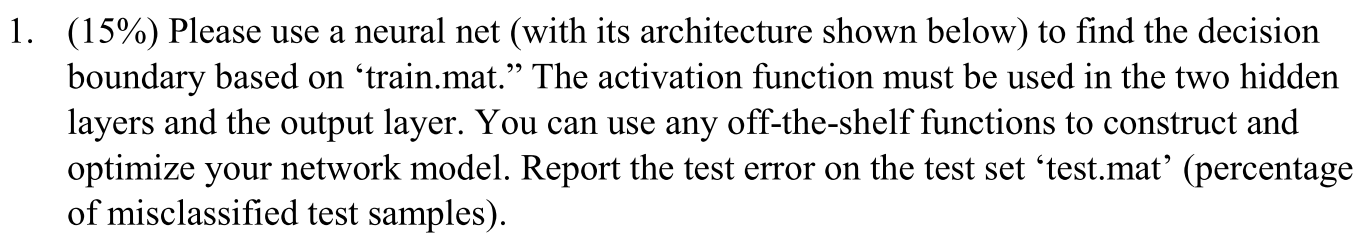

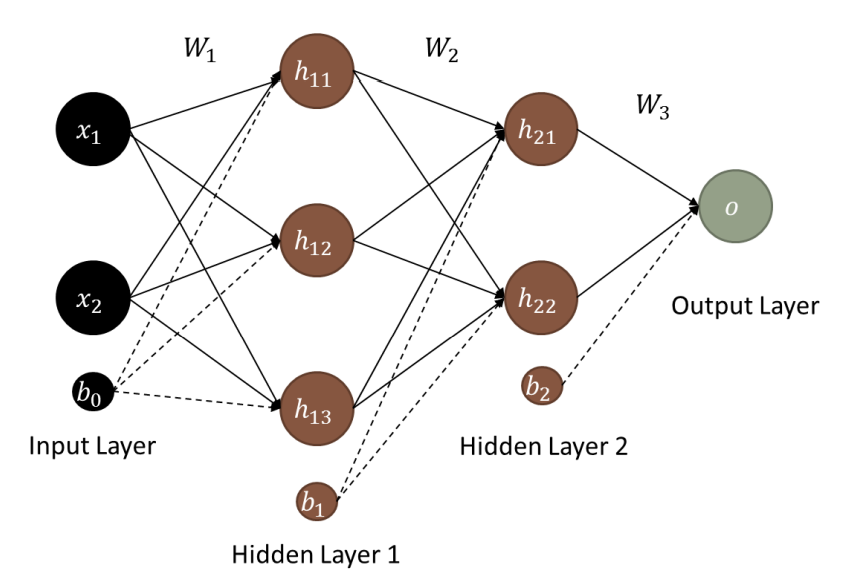

### Results
- test accuracy = 0.9666666666666667
- in other words, test error is about 3.4% 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import scipy.io
mat = scipy.io.loadmat('/content/drive/MyDrive/110_I/110_I_DeepLearning/HW3/HW3/train.mat')
mat_test = scipy.io.loadmat('/content/drive/MyDrive/110_I/110_I_DeepLearning/HW3/HW3/test.mat')

In [ ]:
dir(mat)

In [4]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'x1', 'x2', 'y'])

In [ ]:
mat['x2']

In [ ]:
mat['y']

In [6]:
print(len(mat['x2']), len(mat_test['x2']))

70 30


In [7]:
import pandas as pd
df_x1 = pd.DataFrame.from_dict(mat['x1'])
df_x2 = pd.DataFrame.from_dict(mat['x2'])
df_y = pd.DataFrame.from_dict(mat['y'])

df_x1_test = pd.DataFrame.from_dict(mat_test['x1'])
df_x2_test = pd.DataFrame.from_dict(mat_test['x2'])
df_y_test = pd.DataFrame.from_dict(mat_test['y'])

In [8]:
type(df_y)

pandas.core.frame.DataFrame

In [9]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       70 non-null     uint8
dtypes: uint8(1)
memory usage: 198.0 bytes


In [10]:
df_x2

,0
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
...,...
65,2.4
66,2.4
67,2.7
68,2.7


In [11]:
# adding column name to the respective columns
df_x1.columns =['x1']
df_x2.columns =['x2']
df_y.columns =['y']

df_x1_test.columns =['x1']
df_x2_test.columns =['x2']
df_y_test.columns =['y']

In [12]:
myX = df_x1.join(df_x2)
myX_test = df_x1_test.join(df_x2_test)

In [14]:
print(df_y.isna().sum(), df_y_test.isna().sum())

y    0
dtype: int64 y    0
dtype: int64


In [15]:
myX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      70 non-null     float64
 1   x2      70 non-null     float64
dtypes: float64(2)
memory usage: 1.2 KB


In [16]:
X = myX
y = df_y
X_test = myX_test
y_test = df_y_test

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X = sc.fit_transform(X)
scaled_X_test = sc.fit_transform(X_test)

In [18]:
scaled_X[0:5,]

array([[-0.64839479,  0.77798933],
       [-0.95199101, -0.24184687],
       [-1.25558723,  0.16608761],
       [-1.40738534, -0.03787963],
       [-0.8001929 ,  0.98195657]])

In [19]:
% tensorflow_version 2.x

In [21]:
print(scaled_X.shape, scaled_X_test.shape)

(70, 2) (30, 2)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Dense => x * w + b
model = Sequential()
model.add(Dense(3,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu',))
model.add(Dense(1,activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
 dense_1 (Dense)             (None, 2)                 8         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [23]:
#model.compile(optimizer='sgd',
#       loss='binary_crossentropy',
#       metrics=['accuracy'])

model.compile(optimizer='adam',
       loss='binary_crossentropy',
       metrics=['accuracy'])

In [24]:
history = model.fit(scaled_X, y,
          batch_size = 30,
          epochs  = 1000,
          verbose  = 0)

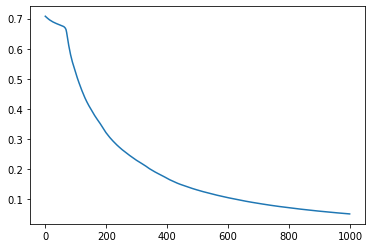

In [25]:
from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('loss'))), history.history.get('loss'))

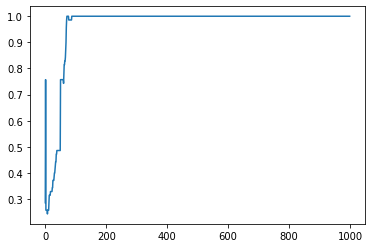

In [26]:
from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('accuracy'))), history.history.get('accuracy'))

In [27]:
predictions = model(scaled_X_test).numpy()

In [28]:
predicted_y = (predictions > 0.5).flatten().astype(int)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicted_y)

0.9666666666666667

In [32]:
loss, accuracy = model.evaluate(scaled_X_test, y_test)
print('loss: ', loss, ' accuracy: ', accuracy)

1/1 [==============================] - 0s 297ms/step - loss: 0.0971 - accuracy: 0.9667
loss:  0.09709960967302322  accuracy:  0.9666666388511658


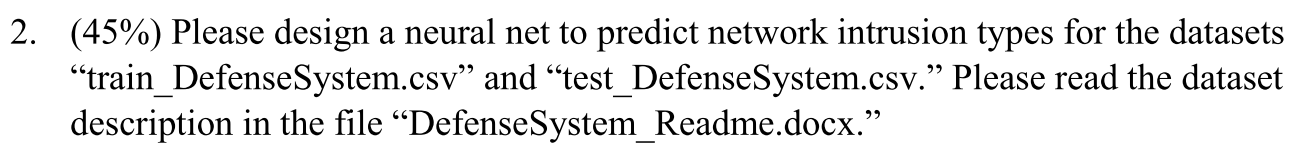

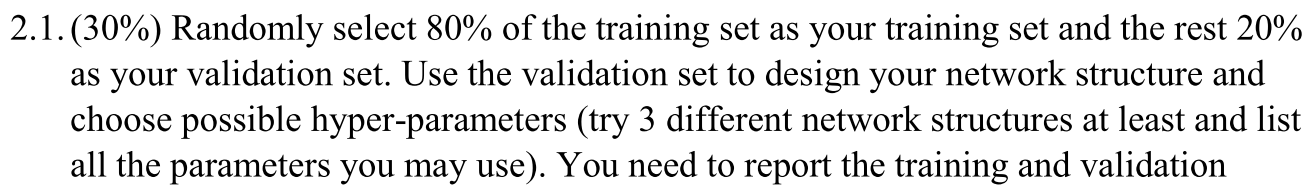

### 4 testing models
- model_1: no Dropout(0.1) or BatchNormalization()
- model_2: with model.add(Dropout(0.1)) 
- model_3: with model.add(BatchNormalization())
- model_4: with both Dropout(0.1) and BatchNormalization()

### testing hyper-parameters via GridSearchCV, including parameters as follows: 
- myActivation = ['relu','sigmoid']
- myDense = [64, 128]
- optimizer = ['RMSprop', 'Adam', 'SGD']
- init_mode = ['GlorotUniform', 'RandomUniform', 'RandomNormal'] 
- batches = [64, 128, 512]
- epochs = [5, 10, 15, 20]

### Results
- model_1: Best Accuracy for 0.9967503120157851 using {'batch_size': 64, 'epochs': 5, 'init': 'RandomNormal', 'myActivation': 'sigmoid', 'myDense': 128, 'optimizer': 'Adam'} Validation loss: 0.018947454169392586 Validation accuracy: 0.996999979019165
- model_2: Best Accuracy for 0.9965002495001561 using {'batch_size': 64, 'epochs': 10, 'init': 'GlorotUniform', 'myActivation': 'relu', 'myDense': 64, 'optimizer': 'RMSprop'} Validation loss: 0.05629873648285866 Validation accuracy: 0.996999979019165
- model_3: Best Accuracy for 0.9964998745938359 using {'batch_size': 128, 'epochs': 15, 'init': 'RandomUniform', 'myActivation': 'sigmoid', 'myDense': 64, 'optimizer': 'SGD'} Validation loss: 0.29477590322494507 Validation accuracy: 0.9940000176429749
- model_4: Best Accuracy for 0.9970011243440545 using {'batch_size': 128, 'epochs': 20, 'init': 'RandomUniform', 'myActivation': 'sigmoid', 'myDense': 128, 'optimizer': 'RMSprop'} Validation loss: 0.05476351082324982 Validation accuracy: 0.9959999918937683

### Best Result
- Best model: model_1
- Validation Accuracy = 0.996999979019165
- hyper-parameters
 - batch = 64
 - epoch = 5
 - init = RandomNormal
 - Activation = 'sigmoid'
 - Dense = 128
 - optimizer = 'Adam'


In [ ]:
# /content/drive/MyDrive/110_I/110_I_DeepLearning/HW3/HW3/train_DefenseSystem.csv
# https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/
# https://neptune.ai/blog/hyperparameter-tuning-in-python-a-complete-guide-2020
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
# https://towardsdatascience.com/machine-learning-with-python-classification-complete-tutorial-d2c99dc524ec
# https://keras.io/api/models/model_training_apis/
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

In [ ]:
###***
import io
import pandas as pd
import numpy as np

df2_training = pd.read_csv('/content/drive/MyDrive/110_I/110_I_DeepLearning/HW3/HW3/train_DefenseSystem.csv')
df2_testing = pd.read_csv('/content/drive/MyDrive/110_I/110_I_DeepLearning/HW3/HW3/test_DefenseSystem.csv')

print(df2_training.shape, df2_testing.shape)

(5000, 18) (1020, 17)


In [ ]:
df2_training[0:5]

,device_dev_name,device_family_name,device_hashed_mac,device_os_name,device_type_name,device_vendor_name,event_protocol_id,event_flow_outbound_or_inbound,event_role_device_or_router,event_role_server_or_client,event_rule_category,event_rule_id,event_rule_name,event_rule_reference,event_rule_severity,event_self_ipv4,event_time,router_ip
0,Windows XP,Computer,a01f58b5c4fdb3122d6797ada0a3ee71fbe134dd,Windows XP,Desktop/Laptop,Microsoft Corp.,6,outbound,device,client,Access Control,1050015,WEB Cross-site Scripting -34,CVE-2011-2133; CVE-2014-4116,4,192.168.1.243,12/15/2016 3:57,161.139.40.242
1,Windows,Computer,7c16de1f49ef32f5354a33ccd2ec5d0d5ef9e100,Windows,Desktop/Laptop,Microsoft Corp.,6,outbound,device,client,Web Attack,1130593,WEB Microsoft IIS HTTP.sys Remote Code Executi...,CVE-2015-1635; MS15-034,5,192.168.1.133,12/11/2016 6:54,199.221.3.43
2,Windows 8/10,Computer,6f8cdf9d553e2e1cba4c3b0ad226e6c7df119005,Windows 8/10,Desktop/Laptop,Microsoft Corp.,6,outbound,device,client,Access Control,1056078,WEB Hashtable Collisions,CVE-2011-3414; CVE-2011-5034; CVE-2011-5035; C...,5,192.168.1.100,12/24/2016 1:20,157.2.60.102
3,Windows,Computer,4ac93ab7639e8800779afd887d6df7a93deb5c62,Windows,Desktop/Laptop,Microsoft Corp.,6,outbound,device,client,Access Control,1050015,WEB Cross-site Scripting -34,CVE-2011-2133; CVE-2014-4116,4,192.168.1.6,12/31/2016 7:22,51.20.54.170
4,Windows,Computer,02de4773b0099f5b0a873516d76a888c3f4c6508,Windows,Desktop/Laptop,Microsoft Corp.,6,outbound,device,client,Access Control,1050015,WEB Cross-site Scripting -34,CVE-2011-2133; CVE-2014-4116,4,192.168.1.44,12/19/2016 12:22,116.95.157.235


In [ ]:
df2_testing[0:5]

,device_dev_name,device_family_name,device_hashed_mac,device_os_name,device_type_name,device_vendor_name,event_protocol_id,event_flow_outbound_or_inbound,event_role_device_or_router,event_role_server_or_client,event_rule_id,event_rule_name,event_rule_reference,event_rule_severity,event_self_ipv4,event_time,router_ip
0,Nokia Internet Tablet,Handheld,d38ac41e3a90e7f8bb8bf404d3c0443cf8350dc5,Maemo,PDA,Maemo,6,outbound,device,client,1056078,WEB Hashtable Collisions,CVE-2011-3414; CVE-2011-5034; CVE-2011-5035; C...,5,192.168.11.142,12/7/2016 14:39,171.186.84.152
1,Windows,Computer,c915de53864e5cb6d2331dc1e82b6dca72f02a3b,Windows,Desktop/Laptop,Microsoft Corp.,6,outbound,device,client,1059684,EXPLOIT Bitcoin/LiteCoin/Dogecoin Mining Activ...,CVE-2014-unknown; http://mining.bitcoin.cz/str...,4,192.168.2.130,12/16/2016 5:23,46.80.199.99
2,Windows,Computer,c957a50200f875d46bdc6d067ac6439479df22b9,Windows,Desktop/Laptop,Microsoft Corp.,6,outbound,device,client,1059684,EXPLOIT Bitcoin/LiteCoin/Dogecoin Mining Activ...,CVE-2014-unknown; http://mining.bitcoin.cz/str...,4,192.168.3.53,12/28/2016 22:49,167.105.79.243
3,Windows 7,Computer,6f6c01a2b2a10810e89bff4f12944b4a6af19fa5,Windows 7,Desktop/Laptop,Microsoft Corp.,6,outbound,device,client,1130593,WEB Microsoft IIS HTTP.sys Remote Code Executi...,CVE-2015-1635; MS15-034,5,192.168.1.99,12/2/2016 7:42,184.152.193.94
4,Windows,Computer,8b094f6cd12f39edf37fa1b817289ec3a4f936d0,Windows,Desktop/Laptop,Microsoft Corp.,6,outbound,device,client,1059684,EXPLOIT Bitcoin/LiteCoin/Dogecoin Mining Activ...,CVE-2014-unknown; http://mining.bitcoin.cz/str...,4,192.168.1.29,12/29/2016 11:27,135.200.118.28


In [ ]:
print(type(df2_training), type(df2_testing))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [ ]:
# https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/
# mlp for binary classification

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df2_training['event_rule_category'].value_counts()

Web Attack        2507
Access Control    2493
Name: event_rule_category, dtype: int64

In [ ]:
# encode strings to integer
df2_training['event_rule_category'] = LabelEncoder().fit_transform(df2_training['event_rule_category'])
df2_training['event_rule_category'].value_counts()

1    2507
0    2493
Name: event_rule_category, dtype: int64

In [ ]:
# combine training and testing data
df2_combine_train_test = pd.concat([df2_training, df2_testing], axis=0)
print(df2_combine_train_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6020 entries, 0 to 1019
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   device_dev_name                 6020 non-null   object 
 1   device_family_name              6020 non-null   object 
 2   device_hashed_mac               6020 non-null   object 
 3   device_os_name                  6020 non-null   object 
 4   device_type_name                6020 non-null   object 
 5   device_vendor_name              6020 non-null   object 
 6   event_protocol_id               6020 non-null   int64  
 7   event_flow_outbound_or_inbound  6020 non-null   object 
 8   event_role_device_or_router     6020 non-null   object 
 9   event_role_server_or_client     6020 non-null   object 
 10  event_rule_category             5000 non-null   float64
 11  event_rule_id                   6020 non-null   int64  
 12  event_rule_name                 60

In [ ]:
# https://ithelp.ithome.com.tw/articles/10233484
for col in df2_combine_train_test.columns[:]:
  #print(col)
  print(col, ':', len(df2_combine_train_test[col].unique()), ' labels')

device_dev_name : 49  labels
device_family_name : 7  labels
device_hashed_mac : 3931  labels
device_os_name : 24  labels
device_type_name : 17  labels
device_vendor_name : 28  labels
event_protocol_id : 3  labels
event_flow_outbound_or_inbound : 2  labels
event_role_device_or_router : 2  labels
event_role_server_or_client : 2  labels
event_rule_category : 3  labels
event_rule_id : 54  labels
event_rule_name : 54  labels
event_rule_reference : 38  labels
event_rule_severity : 2  labels
event_self_ipv4 : 1191  labels
event_time : 5433  labels
router_ip : 4492  labels


In [ ]:
# https://www.journaldev.com/23365/python-string-to-datetime-strptime
# event_time
from datetime import timedelta
from datetime import datetime

myDate = []
myTime = []
dateFormatter = '%m/%d/%Y'
timeFormatter = '%H:%M'

for i in df2_combine_train_test.event_time:
  #print(i)
  dateString = i.split()[0]
  timeString = i.split()[1]
  myDate.append(datetime.strptime(dateString, dateFormatter).date())
  myTime.append(datetime.strptime(timeString, timeFormatter).time())
  #print(datetime.strptime(dateString, dateFormatter).date())

In [ ]:
import numpy as np

df2_combine_train_test['event_time_date'] = np.array(myDate)
df2_combine_train_test['event_time_time'] = np.array(myTime)

In [ ]:
myDate_ = []
for i in df2_combine_train_test['event_time_date']:
  myDate_.append((int(i.strftime("%Y%m%d"))))

myTime_ = []
for i in df2_combine_train_test['event_time_time']:
  myTime_.append((int(i.strftime("%H%M%S"))))

In [ ]:
from pandas.core.frame import DataFrame
df2_combine_train_test['event_time_date'] = DataFrame(myDate_)
df2_combine_train_test['event_time_time'] = DataFrame(myTime_)

In [ ]:
df2_combine_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6020 entries, 0 to 1019
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   device_dev_name                 6020 non-null   object 
 1   device_family_name              6020 non-null   object 
 2   device_hashed_mac               6020 non-null   object 
 3   device_os_name                  6020 non-null   object 
 4   device_type_name                6020 non-null   object 
 5   device_vendor_name              6020 non-null   object 
 6   event_protocol_id               6020 non-null   int64  
 7   event_flow_outbound_or_inbound  6020 non-null   object 
 8   event_role_device_or_router     6020 non-null   object 
 9   event_role_server_or_client     6020 non-null   object 
 10  event_rule_category             5000 non-null   float64
 11  event_rule_id                   6020 non-null   int64  
 12  event_rule_name                 60

In [ ]:
# https://ithelp.ithome.com.tw/articles/10233484
for col in df2_combine_train_test.columns[:]:
  #print(col)
  print(col, ':', len(df2_combine_train_test[col].unique()), ' labels')

device_dev_name : 49  labels
device_family_name : 7  labels
device_hashed_mac : 3931  labels
device_os_name : 24  labels
device_type_name : 17  labels
device_vendor_name : 28  labels
event_protocol_id : 3  labels
event_flow_outbound_or_inbound : 2  labels
event_role_device_or_router : 2  labels
event_role_server_or_client : 2  labels
event_rule_category : 3  labels
event_rule_id : 54  labels
event_rule_name : 54  labels
event_rule_reference : 38  labels
event_rule_severity : 2  labels
event_self_ipv4 : 1191  labels
event_time : 5433  labels
router_ip : 4492  labels
event_time_date : 31  labels
event_time_time : 1380  labels


In [ ]:
df2_combine_train_test_drop = df2_combine_train_test.drop(['device_hashed_mac', 'event_self_ipv4', 'router_ip', 'event_time'], axis=1)

In [ ]:
# https://ithelp.ithome.com.tw/articles/10233484
for col in df2_combine_train_test_drop.columns[:]:
  if col == 'event_time_time':
    a=1
  elif col == 'event_rule_category':
    b=1
  else:
    one_hot_tmp =  pd.get_dummies(df2_combine_train_test_drop[col])
    df2_combine_train_test_drop = pd.concat([df2_combine_train_test_drop, one_hot_tmp],axis=1)
    df2_combine_train_test_drop = df2_combine_train_test_drop.drop([col], axis=1)

In [ ]:
display(df2_combine_train_test_drop.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6020 entries, 0 to 1019
Columns: 315 entries, event_rule_category to 20161231
dtypes: float64(1), int64(1), uint8(313)
memory usage: 1.9 MB


None

In [ ]:
display(df2_combine_train_test_drop.describe())

,event_rule_category,event_time_time,ASUS RT Router,Amazon Kindle,Android 3.0-4.1,Android 4.2-5.1,Android 6.0,Apple Watch/iPad Pro,Axis Network Camera,Belkin F5D8235-4 v2,BlackBerry,Chromebook,Chromecast,D-Link IPCam,ELECOM/PLANEX/Logitec Wireless Access Point,Fedora 14-16 based distro,FirefoxOS Mobile,Hewlett-Packard iLO Agent (Not Configured),LG SmartTV,Linux,Mac OS X,NETGEAR NTV300,NETGEAR R6300,NETGEAR arlo,NetBotz WallBotz 500,Nintendo Wii U,Nokia Internet Tablet,Novell NetWare Client,PXE Client,PXE Client (ZEN),Pioneer BDP,Red Hat Linux,Roku Device,Samsung Gear S2,Sony PlayStation 2,Sony PlayStation 3,Sony PlayStation Vita,Trendnet Print Server,Ubuntu 9-10 based distro,Windows,...,CVE-2016-5674; msf,CVE-2016-unknown,EDB-32623; CVE-2013-5014; CVE-2013-6447; CVE-2013-6429; CVE-2014-0002; CVE-2014-0423; CVE-2014-0054; CVE-2014-0092; CVE-2011-1892; CVE-2013-4152; CVE-2014-3490; CVE-2015-0921; CVE-2015-1646; CVE-2015-6096; msf,None,http://en.wikipedia.org/wiki/NOP_slide; CVE-2005-0211,http://klikki.fi/adv/wordpress2.html; CVE-2015-unknown,none,4,5,20161201,20161202,20161203,20161204,20161205,20161206,20161207,20161208,20161209,20161210,20161211,20161212,20161213,20161214,20161215,20161216,20161217,20161218,20161219,20161220,20161221,20161222,20161223,20161224,20161225,20161226,20161227,20161228,20161229,20161230,20161231
count,5000.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,...,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000,6020.000000
mean,0.501400,116915.149502,0.001163,0.000498,0.000831,0.059635,0.011296,0.003654,0.000332,0.000831,0.002326,0.006977,0.000332,0.001993,0.000166,0.000332,0.000332,0.000166,0.003322,0.005814,0.018937,0.000332,0.000166,0.000332,0.003156,0.000166,0.007475,0.000166,0.000332,0.001163,0.000166,0.000997,0.000498,0.000332,0.000831,0.000166,0.000166,0.000166,0.003987,0.690365,...,0.002326,0.004817,0.000332,0.003821,0.040365,0.000664,0.026412,0.638704,0.361296,0.031894,0.032226,0.033223,0.032060,0.033056,0.033887,0.032558,0.031063,0.033887,0.035714,0.030066,0.031561,0.038372,0.035548,0.034718,0.027741,0.029734,0.026246,0.026412,0.028738,0.030066,0.034884,0.034884,0.032890,0.031395,0.036047,0.035714,0.032890,0.032226,0.029568,0.030731
std,0.500048,66816.570761,0.034083,0.022320,0.028810,0.236828,0.105688,0.060347,0.018226,0.028810,0.048172,0.083242,0.018226,0.044606,0.012888,0.018226,0.018226,0.012888,0.057548,0.076034,0.136313,0.018226,0.012888,0.018226,0.056096,0.012888,0.086142,0.012888,0.018226,0.034083,0.012888,0.031557,0.022320,0.018226,0.028810,0.012888,0.012888,0.012888,0.063020,0.462381,...,0.048172,0.069245,0.018226,0.061698,0.196831,0.025771,0.160370,0.480416,0.480416,0.175732,0.176614,0.179232,0.176174,0.178799,0.180953,0.177492,0.173503,0.180953,0.185592,0.170784,0.174844,0.192109,0.185176,0.183079,0.164243,0.169867,0.159879,0.160370,0.167082,0.170784,0.183501,0.183501,0.178364,0.174398,0.186421,0.185592,0.178364,0.176614,0.169407,0.172602
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [ ]:
df2_combine_train_test_drop['event_rule_category']

0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
1015    NaN
1016    NaN
1017    NaN
1018    NaN
1019    NaN
Name: event_rule_category, Length: 6020, dtype: float64

In [ ]:
df2_combine_train_test_drop.shape

(6020, 315)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
y_training = df2_combine_train_test_drop['event_rule_category'][0:df2_training.shape[0]]
df2_combine_train_test_drop2 = df2_combine_train_test_drop.drop(['event_rule_category'], axis=1)
df2_combine_train_test_drop2 = StandardScaler().fit_transform(df2_combine_train_test_drop2.values)
X_training = df2_combine_train_test_drop2[0:df2_training.shape[0]]
X_testing = df2_combine_train_test_drop2[df2_training.shape[0]:]

In [ ]:
print(X_training.shape, y_training.shape, X_testing.shape)

(5000, 314) (5000,) (1020, 314)


In [ ]:
# SVM Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = SVC()
X = X_training
y = y_training
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.9917999999999999


In [ ]:
from sklearn.model_selection import train_test_split
XX_train, XX_validate, yy_train, yy_validate = train_test_split(X_training, y_training, test_size=0.20)
yy_train.value_counts()

1.0    2001
0.0    1999
Name: event_rule_category, dtype: int64

In [ ]:
# SVM Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = SVC()
X = X_training
y = y_training
results = cross_val_score(model, XX_train, yy_train, cv=kfold)
print(results.mean())

0.9890000000000002


In [ ]:
print(type(XX_train), type(yy_train))

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>


In [ ]:
print(XX_train.shape, yy_train.shape)

(4000, 314) (4000,)


In [ ]:
len(yy_train.unique())

2

In [ ]:
import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses
from sklearn.utils import shuffle

import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import BatchNormalization

# repeat some of the initial values here so we make sure they were not changed
input_dim = XX_train.shape[1]

# build models
# model_1 
def model_1(optimizer='RMSprop', init='GlorotUniform', myDense=64, myActivation=tf.nn.relu):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, kernel_initializer=init, activation='relu'))
    model.add(Dense(myDense, kernel_initializer=init, activation=myActivation))
    model.add(Dense(myDense, kernel_initializer=init, activation=myActivation))
    model.add(Dense(myDense, kernel_initializer=init, activation=myActivation))
    model.add(Dense(myDense, kernel_initializer=init, activation=myActivation))
    model.add(Dense(1, kernel_initializer=init, activation=tf.nn.sigmoid))

    # compile model
    model.compile(loss='binary_crossentropy', 
                  optimizer=optimizer, 
                  metrics=['accuracy'])

    return model

# model_2 with dropout
def model_2(optimizer='RMSprop', init='GlorotUniform', myDense=64, myActivation=tf.nn.relu):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, kernel_initializer=init, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(myDense, kernel_initializer=init, activation=myActivation))
    model.add(Dropout(0.1))
    model.add(Dense(myDense, kernel_initializer=init, activation=myActivation))
    model.add(Dropout(0.1))
    model.add(Dense(myDense, kernel_initializer=init, activation=myActivation))
    model.add(Dropout(0.1))
    model.add(Dense(myDense, kernel_initializer=init, activation=myActivation))
    model.add(Dropout(0.1))
    model.add(Dense(1, kernel_initializer=init, activation=tf.nn.sigmoid))

    # compile model
    model.compile(loss='binary_crossentropy', 
                  optimizer=optimizer, 
                  metrics=['accuracy'])

    return model

# model_3
def model_3(optimizer='RMSprop', init='GlorotUniform', myDense=64, myActivation=tf.nn.relu):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, kernel_initializer=init, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(myDense, kernel_initializer=init, activation=myActivation))
    model.add(BatchNormalization())
    model.add(Dense(myDense, kernel_initializer=init, activation=myActivation))
    model.add(BatchNormalization())
    model.add(Dense(myDense, kernel_initializer=init, activation=myActivation))
    model.add(BatchNormalization())
    model.add(Dense(myDense, kernel_initializer=init, activation=myActivation))
    model.add(BatchNormalization())
    model.add(Dense(1, kernel_initializer=init, activation=tf.nn.sigmoid))

    # compile model
    model.compile(loss='binary_crossentropy', 
                  optimizer=optimizer, 
                  metrics=['accuracy'])

    return model

# model_4 with dropout and batch norm
def model_4(optimizer='RMSprop', init='GlorotUniform', myDense=64, myActivation=tf.nn.relu):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, kernel_initializer=init, activation='relu'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(Dense(myDense, kernel_initializer=init, activation=myActivation))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(Dense(myDense, kernel_initializer=init, activation=myActivation))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(Dense(myDense, kernel_initializer=init, activation=myActivation))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(Dense(myDense, kernel_initializer=init, activation=myActivation))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(Dense(1, kernel_initializer=init, activation=tf.nn.sigmoid))

    # compile model
    model.compile(loss='binary_crossentropy', 
                  optimizer=optimizer, 
                  metrics=['accuracy'])

    return model

In [ ]:
try:
    import scikeras
except ImportError:
    !python -m pip install scikeras

In [ ]:
import warnings
from tensorflow import get_logger
get_logger().setLevel('ERROR')
warnings.filterwarnings("ignore", message="Setting the random state for TF")

In [ ]:
import numpy as np
from scikeras.wrappers import KerasClassifier
from tensorflow import keras

In [ ]:
%%time
# fix random seed for reproducibility (this might work or might not work 
# depending on each library's implenentation)
seed = 7
numpy.random.seed(seed)

# myModels
myModels = [model_1, model_2, model_3, model_4]

# we choose the initializers that came at the top in our previous cross-validation!!
myActivation = ['relu','sigmoid']
myDense = [64, 128]
optimizer = ['RMSprop', 'Adam', 'SGD']
init_mode = ['GlorotUniform', 'RandomUniform', 'RandomNormal'] 
batches = [64, 128, 512]
epochs = [5, 10, 15, 20]

myBestModel = ''
myBestAccuracy = 0
myBest_batch_size = ''
myBest_epochs = ''
myBest_init = ''
myBest_myActivation = ''
myBest_myDense = ''
myBest_optimizer = ''

for i in myModels:
  # create the sklearn model for the network
  model_init_batch_epoch_CV = KerasClassifier(model = i, init='GlorotUniform', myActivation='relu', myDense=64, verbose=0)
  # grid search for initializer, batch size and number of epochs
  param_grid = dict(epochs=epochs, batch_size=batches, init=init_mode, optimizer=optimizer, myDense=myDense, myActivation=myActivation)
  grid = GridSearchCV(estimator=model_init_batch_epoch_CV, param_grid=param_grid, cv=3)
  grid_result = grid.fit(XX_train, yy_train)

  # print results
  print(i)
  print(f'Best Accuracy for {grid_result.best_score_} using {grid_result.best_params_}')
  #print(type(grid_result.best_params_))
  #print(grid_result.best_params_.keys())
  batch_size2 = grid_result.best_params_['batch_size']
  epochs2 = grid_result.best_params_['epochs']
  init2 = grid_result.best_params_['init']
  myActivation2 = grid_result.best_params_['myActivation']
  myDense2 = grid_result.best_params_['myDense']
  optimizer2 = grid_result.best_params_['optimizer']

  # myBest_model
  myBest_model = i(init= init2, 
            myActivation = myActivation2, 
            myDense = myDense2, 
            optimizer = optimizer2)
  
  myBest_model.compile(loss='binary_crossentropy', 
            optimizer=optimizer2, 
            metrics=['accuracy'])  

  # fit the myBest_model
  history = myBest_model.fit(XX_train, yy_train, batch_size = batch_size2, epochs = epochs2, verbose=0)

  # test validation
  score = myBest_model.evaluate(XX_validate, yy_validate, verbose=0)
  print("Validation loss:", score[0])
  print("Validation accuracy:", score[1])

  if (score[1] > myBestAccuracy):
    myBestModel = i
    myBestAccuracy = score[1]
    myBest_batch_size = grid_result.best_params_['batch_size']
    myBest_epochs = grid_result.best_params_['epochs']
    myBest_init = grid_result.best_params_['init']
    myBest_myActivation = grid_result.best_params_['myActivation']
    myBest_myDense = grid_result.best_params_['myDense']
    myBest_optimizer = grid_result.best_params_['optimizer']

print(myBestModel)
print(myBestAccuracy)
print(myBest_batch_size)
print(myBest_epochs)
print(myBest_init)
print(myBest_myActivation)
print(myBest_myDense)
print(myBest_optimizer)

<function model_1 at 0x7fab5003add0>
Best Accuracy for 0.9967503120157851 using {'batch_size': 64, 'epochs': 5, 'init': 'RandomNormal', 'myActivation': 'sigmoid', 'myDense': 128, 'optimizer': 'Adam'}
Validation loss: 0.018947454169392586
Validation accuracy: 0.996999979019165
<function model_2 at 0x7fab5003a8c0>
Best Accuracy for 0.9965002495001561 using {'batch_size': 64, 'epochs': 10, 'init': 'GlorotUniform', 'myActivation': 'relu', 'myDense': 64, 'optimizer': 'RMSprop'}
Validation loss: 0.05629873648285866
Validation accuracy: 0.996999979019165
<function model_3 at 0x7fab5003a320>
Best Accuracy for 0.9964998745938359 using {'batch_size': 128, 'epochs': 15, 'init': 'RandomUniform', 'myActivation': 'sigmoid', 'myDense': 64, 'optimizer': 'SGD'}
Validation loss: 0.29477590322494507
Validation accuracy: 0.9940000176429749
<function model_4 at 0x7fab5003a950>
Best Accuracy for 0.9970011243440545 using {'batch_size': 128, 'epochs': 20, 'init': 'RandomUniform', 'myActivation': 'sigmoid', 'm

In [ ]:
print(myBestModel)

<function model_1 at 0x7fab5003add0>


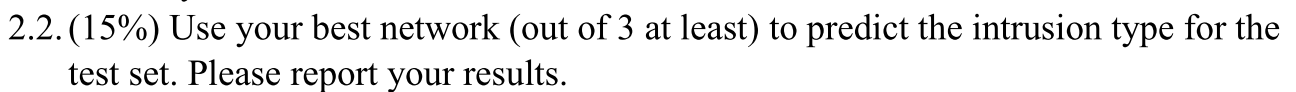

### Results:
- 0: 509
- 1: 511

In [ ]:
# myBest_model
myFinal_model = myBestModel(init= myBest_init, 
            myActivation = myBest_myActivation, 
            myDense = myBest_myDense, 
            optimizer = myBest_optimizer)
  
myFinal_model.compile(loss='binary_crossentropy', 
            optimizer=myBest_optimizer, 
            metrics=['accuracy'])  

# fit the myBest_model
history = myFinal_model.fit(X_training, y_training, batch_size = myBest_batch_size, epochs = myBest_epochs, verbose=0)

# testing data
myPred = myFinal_model.predict(X_testing)
myPred =(myPred>0.5).astype(int)
(unique, counts) = np.unique(myPred, return_counts=True)
print(unique, counts)


[0 1] [509 511]


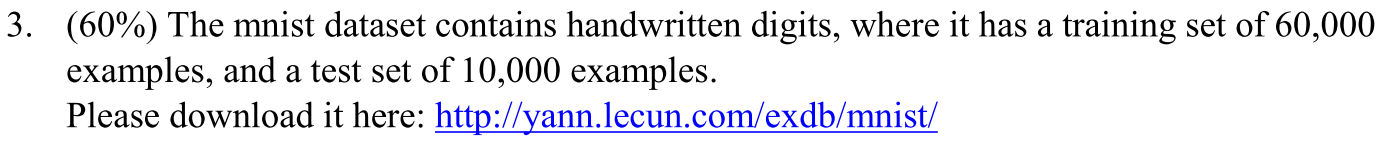

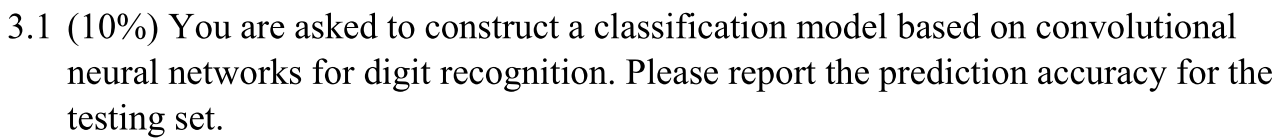

### Results:
- Test loss: 0.054048970341682434
- Test accuracy: 0.9858999848365784

In [ ]:
# https://ai.plainenglish.io/vggnet-with-tensorflow-transfer-learning-with-vgg16-included-7e5f6fa9479a
# https://medium.com/jia-hong/%E5%9F%BA%E6%96%BC-vgg16-%E4%B9%8B%E6%89%8B%E5%AF%AB%E6%95%B8%E5%AD%97%E8%BE%A8%E8%AD%98-9580ba85f224
# https://www.kaggle.com/anandad/classify-fashion-mnist-with-vgg16

In [ ]:
%cd /content/drive/MyDrive/110_I/110_I_DeepLearning/HW3

/content/drive/MyDrive/110_I/110_I_DeepLearning/HW3


In [ ]:
!wget -N http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz  #training set images (9912422 bytes)
!wget -N http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz  #training set labels (28881 bytes)
!wget -N http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz   #test set images (1648877 bytes)
!wget -N http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz   #test set labels (4542 bytes)

--2021-12-16 15:31:25--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘train-images-idx3-ubyte.gz’ not modified on server. Omitting download.

--2021-12-16 15:31:25--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘train-labels-idx1-ubyte.gz’ not modified on server. Omitting download.

--2021-12-16 15:31:25--  http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3034::6815:1d24, ...
Connect

In [ ]:
# https://colab.research.google.com/github/chokkan/deeplearning/blob/master/notebook/mnist.ipynb
import gzip
import os
import sys
import struct
import numpy as np

def read_image(fi):
    magic, n, rows, columns = struct.unpack(">IIII", fi.read(16))
    assert magic == 0x00000803
    assert rows == 28
    assert columns == 28
    rawbuffer = fi.read()
    assert len(rawbuffer) == n * rows * columns
    rawdata = np.frombuffer(rawbuffer, dtype='>u1', count=n*rows*columns)
    return rawdata.reshape(n, rows, columns).astype(np.float32) / 255.0

def read_label(fi):
    magic, n = struct.unpack(">II", fi.read(8))
    assert magic == 0x00000801
    rawbuffer = fi.read()
    assert len(rawbuffer) == n
    return np.frombuffer(rawbuffer, dtype='>u1', count=n)

In [ ]:
X_train=read_image(gzip.open('/content/drive/MyDrive/110_I/110_I_DeepLearning/HW3/train-images-idx3-ubyte.gz', 'rb')),
y_train=read_label(gzip.open('/content/drive/MyDrive/110_I/110_I_DeepLearning/HW3/train-labels-idx1-ubyte.gz', 'rb')),
X_test=read_image(gzip.open('/content/drive/MyDrive/110_I/110_I_DeepLearning/HW3/t10k-images-idx3-ubyte.gz', 'rb')),
y_test=read_label(gzip.open('/content/drive/MyDrive/110_I/110_I_DeepLearning/HW3/t10k-labels-idx1-ubyte.gz', 'rb'))

In [ ]:
type(X_training)

numpy.ndarray

In [ ]:
X_training.shape

(60000, 28, 28)

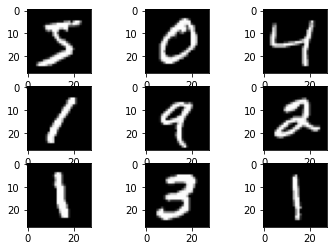

In [ ]:
from matplotlib import pyplot as plt
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_training[i][:,:], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [ ]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

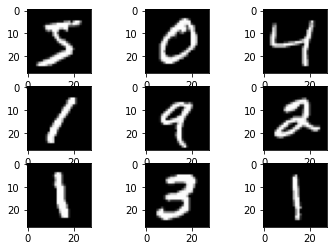

In [ ]:
from matplotlib import pyplot as plt
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i][:,:], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [ ]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
print(type(X_train), type(y_train))

<class 'tuple'> <class 'tuple'>


In [ ]:
len(X_train[0])

60000

In [ ]:
len(y_test)

10000

In [ ]:
X_training = X_train[0]
y_training = y_train[0]
X_testing = X_test[0]
y_testing = y_test

In [ ]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPooling2D

In [ ]:
# set parameters
n_hidden_1 = 256 
n_classes = 10
training_epochs = 15
batch_size = 100

In [ ]:
y_training = tensorflow.keras.utils.to_categorical(y_training, n_classes)
y_testing  = tensorflow.keras.utils.to_categorical(y_testing, n_classes)

In [ ]:
y_testing.shape

(10000, 10)

In [ ]:
y_training.shape

(60000, 10)

In [ ]:
y_training[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# set model
model = tensorflow.keras.Sequential()
model.add(Conv2D(
            filters=16,
            kernel_size = (3,3),
            padding = 'same',
            input_shape = (28,28,1), 
            activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(n_hidden_1, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
print(X_training.shape, X_testing.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
X_training = X_training.reshape(60000, 28,28,1)
X_testing = X_testing.reshape(10000, 28,28,1)

In [ ]:
print(X_testing.shape, y_testing.shape)

(10000, 28, 28, 1) (10000, 10)


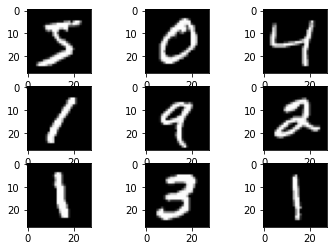

In [ ]:
from matplotlib import pyplot as plt
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_training[i][:,:,0], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [ ]:
history = model.fit(X_training, y_training,
            batch_size=batch_size,
            epochs=training_epochs,
            verbose=1,
            validation_data=(X_testing, y_testing))

Epoch 1/15
600/600 [==============================] - 13s 7ms/step - loss: 0.2048 - accuracy: 0.9411 - val_loss: 0.0745 - val_accuracy: 0.9761
Epoch 2/15
600/600 [==============================] - 5s 8ms/step - loss: 0.0656 - accuracy: 0.9803 - val_loss: 0.0522 - val_accuracy: 0.9833
Epoch 3/15
600/600 [==============================] - 5s 8ms/step - loss: 0.0432 - accuracy: 0.9873 - val_loss: 0.0470 - val_accuracy: 0.9845
Epoch 4/15
600/600 [==============================] - 4s 7ms/step - loss: 0.0307 - accuracy: 0.9903 - val_loss: 0.0406 - val_accuracy: 0.9868
Epoch 5/15
600/600 [==============================] - 5s 8ms/step - loss: 0.0222 - accuracy: 0.9927 - val_loss: 0.0407 - val_accuracy: 0.9864
Epoch 6/15
600/600 [==============================] - 3s 4ms/step - loss: 0.0158 - accuracy: 0.9952 - val_loss: 0.0403 - val_accuracy: 0.9865
Epoch 7/15
600/600 [==============================] - 3s 4ms/step - loss: 0.0115 - accuracy: 0.9966 - val_loss: 0.0432 - val_accuracy: 0.9883
Epoch

In [ ]:
# 顯示損失函數、訓練成果(分數)
score = model.evaluate(X_testing, y_testing, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.054048970341682434
Test accuracy: 0.9858999848365784


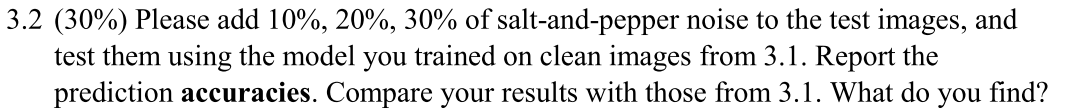

### Results
- 10% noise: accuracy 0.0975
- 20% noise: accuracy 0.0994
- 30% noise: accuracy 0.1006
- compare with 3.1, those accuracies are very low

0.1


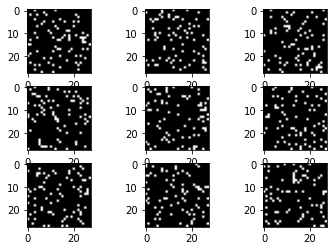

313/313 [==============================] - 1s 4ms/step - loss: 5983.2402 - accuracy: 0.0975
noise:  0.1  accuracy:  0.09749999642372131
0.2


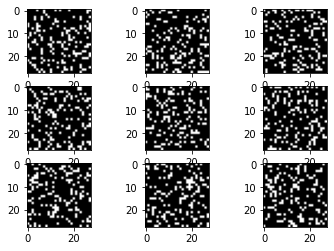

313/313 [==============================] - 1s 4ms/step - loss: 7124.3794 - accuracy: 0.0994
noise:  0.2  accuracy:  0.09939999878406525
0.3


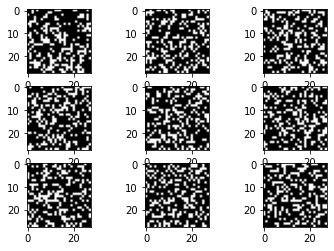

313/313 [==============================] - 1s 4ms/step - loss: 7594.4399 - accuracy: 0.1006
noise:  0.3  accuracy:  0.1005999967455864


In [ ]:
import random 
import numpy as np
from matplotlib import pyplot as plt 

noise = [0.1, 0.2, 0.3]
for k in noise:
  print(k)
  myNoiseXTesting = X_testing.copy()
  noise_lv = k            #0.1, 0.2, 0.3    
  img_size = 28*28 
  for i in range(len(myNoiseXTesting)): 
    ran_seq = random.sample([n for n in range(img_size)], np.int(img_size*noise_lv)) 
    x = myNoiseXTesting[i].reshape(-1, img_size) 
    x[0, ran_seq]=255

  # plot first few images
  for i in range(9):
	  # define subplot
	  plt.subplot(330 + 1 + i)
	  # plot raw pixel data
	  plt.imshow(myNoiseXTesting[i][:,:,0], cmap=plt.get_cmap('gray'))
  # show the figure
  plt.show()


  loss, accuracy = model.evaluate(myNoiseXTesting, y_testing)
  print('noise: ', k, ' accuracy: ', accuracy)

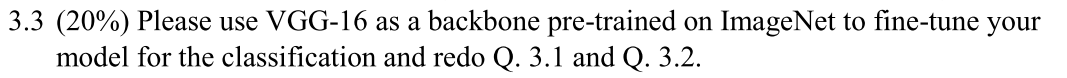

### Results:
- Redo Q3.1
 - Test loss: 0.09519480913877487
 - Test accuracy: 0.9710000157356262
- Redo Q3.2
 - 10% noise: accuracy: 0.0950
 - 20% noise: accuracy: 0.0941
 - 30% noise: accuracy: 0.0929


In [ ]:
X_train=read_image(gzip.open('/content/drive/MyDrive/110_I/110_I_DeepLearning/HW3/train-images-idx3-ubyte.gz', 'rb')),
y_train=read_label(gzip.open('/content/drive/MyDrive/110_I/110_I_DeepLearning/HW3/train-labels-idx1-ubyte.gz', 'rb')),
X_test=read_image(gzip.open('/content/drive/MyDrive/110_I/110_I_DeepLearning/HW3/t10k-images-idx3-ubyte.gz', 'rb')),
y_test=read_label(gzip.open('/content/drive/MyDrive/110_I/110_I_DeepLearning/HW3/t10k-labels-idx1-ubyte.gz', 'rb'))

In [ ]:
print(type(X_train),type(y_train),type(X_test),type(y_test))

<class 'tuple'> <class 'tuple'> <class 'tuple'> <class 'numpy.ndarray'>


In [ ]:
X_training = X_train[0]
y_training = y_train[0]
X_testing = X_test[0]
y_testing = y_test

In [ ]:
print(type(X_training),type(y_training),type(X_testing),type(y_testing))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


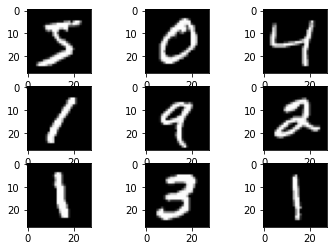

In [ ]:
from matplotlib import pyplot as plt
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_training[i][:,:], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [ ]:
y_train = y_training

In [ ]:
import tensorflow as tf
x_train = tf.pad(X_training, [[0, 0], [2,2], [2,2]])
x_test = tf.pad(X_testing, [[0, 0], [2,2], [2,2]])
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)
x_val = x_train[-2000:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:]
y_train = y_train[:-2000]

In [ ]:
x_train.shape, y_train.shape

(TensorShape([58000, 32, 32, 3]), (58000,))

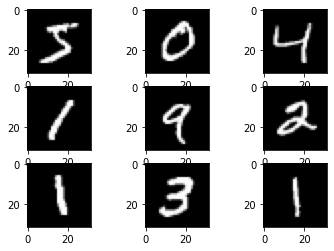

In [ ]:
from matplotlib import pyplot as plt
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i][:,:,0], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

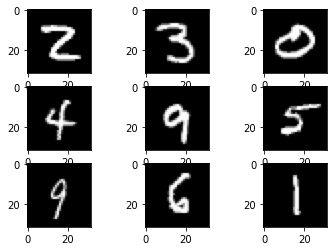

In [ ]:
from matplotlib import pyplot as plt
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_val[i][:,:,0], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

In [ ]:
base_model = tf.keras.applications.VGG16(weights = 'imagenet', include_top = False, input_shape = (32,32,3))
for layer in base_model.layers:
  layer.trainable = False
base_model.summary() 

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses, Model

In [ ]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(10, activation = 'softmax')(x)
head_model = Model(inputs = base_model.input, outputs = predictions)
head_model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
head_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
history = head_model.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_val, y_val))

Epoch 1/40
907/907 [==============================] - 23s 13ms/step - loss: 0.3873 - accuracy: 0.8717 - val_loss: 0.1253 - val_accuracy: 0.9590
Epoch 2/40
907/907 [==============================] - 12s 13ms/step - loss: 0.2443 - accuracy: 0.9207 - val_loss: 0.1168 - val_accuracy: 0.9600
Epoch 3/40
907/907 [==============================] - 11s 13ms/step - loss: 0.2153 - accuracy: 0.9301 - val_loss: 0.1143 - val_accuracy: 0.9665
Epoch 4/40
907/907 [==============================] - 11s 13ms/step - loss: 0.2008 - accuracy: 0.9349 - val_loss: 0.0910 - val_accuracy: 0.9745
Epoch 5/40
907/907 [==============================] - 12s 13ms/step - loss: 0.1926 - accuracy: 0.9376 - val_loss: 0.0852 - val_accuracy: 0.9765
Epoch 6/40
907/907 [==============================] - 12s 13ms/step - loss: 0.1815 - accuracy: 0.9424 - val_loss: 0.0888 - val_accuracy: 0.9730
Epoch 7/40
907/907 [==============================] - 12s 14ms/step - loss: 0.1757 - accuracy: 0.9441 - val_loss: 0.0818 - val_accuracy:

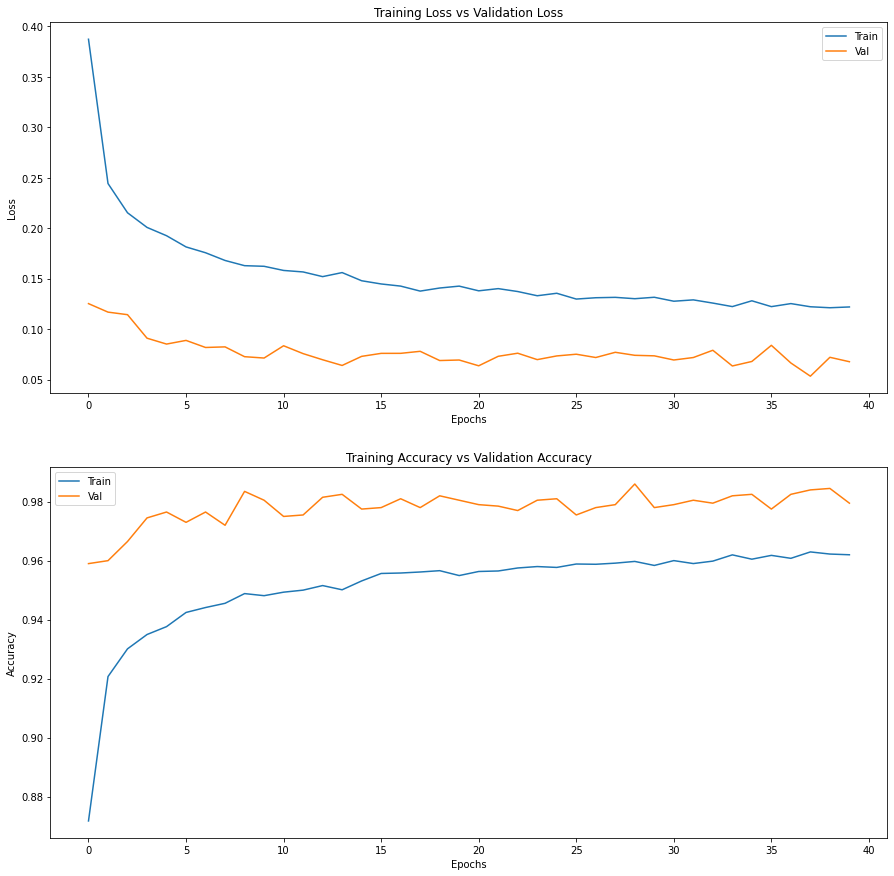

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

In [ ]:
# 顯示損失函數、訓練成果(分數)
score = head_model.evaluate(x_test, y_testing, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09519480913877487
Test accuracy: 0.9710000157356262


0.1


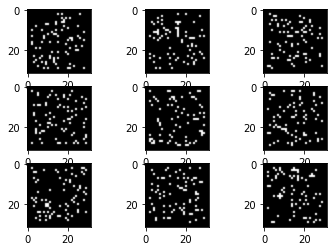

313/313 [==============================] - 3s 10ms/step - loss: 1773.2146 - accuracy: 0.0950
noise:  0.1  accuracy:  0.0949999988079071
0.2


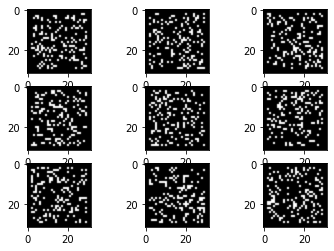

313/313 [==============================] - 3s 9ms/step - loss: 3118.2405 - accuracy: 0.0941
noise:  0.2  accuracy:  0.0940999984741211
0.3


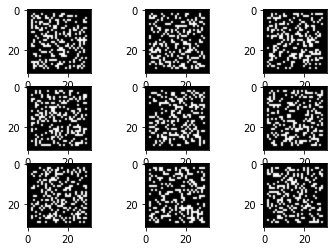

313/313 [==============================] - 3s 9ms/step - loss: 3971.2788 - accuracy: 0.0929
noise:  0.3  accuracy:  0.09290000051259995


In [ ]:
import random 
import numpy as np
from matplotlib import pyplot as plt 

noise = [0.1, 0.2, 0.3]
for k in noise:
  print(k)
  myNoiseXTesting = X_testing.copy()
  noise_lv = k            #0.1, 0.2, 0.3    
  img_size = 28*28 
  for i in range(len(myNoiseXTesting)): 
    ran_seq = random.sample([n for n in range(img_size)], np.int(img_size*noise_lv)) 
    x = myNoiseXTesting[i].reshape(-1, img_size) 
    x[0, ran_seq]=255

  import tensorflow as tf
  x_test = tf.pad(myNoiseXTesting, [[0, 0], [2,2], [2,2]])
  x_test = tf.expand_dims(x_test, axis=3, name=None)
  x_test = tf.repeat(x_test, 3, axis=3)

  # plot first few images
  for i in range(9):
	  # define subplot
	  plt.subplot(330 + 1 + i)
	  # plot raw pixel data
	  plt.imshow(x_test[i][:,:,0], cmap=plt.get_cmap('gray'))
  # show the figure
  plt.show()


  loss, accuracy = head_model.evaluate(x_test, y_testing)
  print('noise: ', k, ' accuracy: ', accuracy)